In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (1).csv


In [ ]:
data = pd.read_csv("crime_data.csv")

In [ ]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## EDA process

In [ ]:
data.rename({'Unnamed: 0':'States'}, axis = 1, inplace = True)

In [ ]:
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
data.dtypes

States       object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [ ]:
data.shape

(50, 5)

In [ ]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [ ]:
data[data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


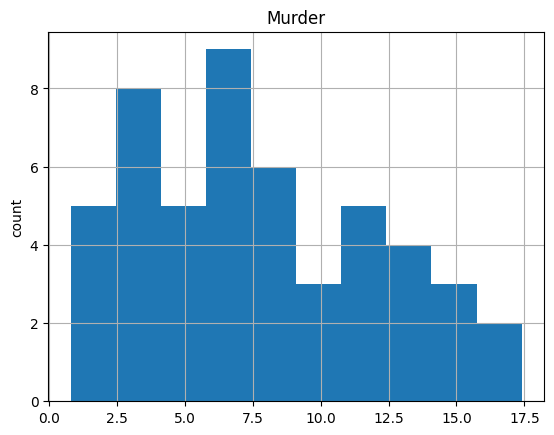

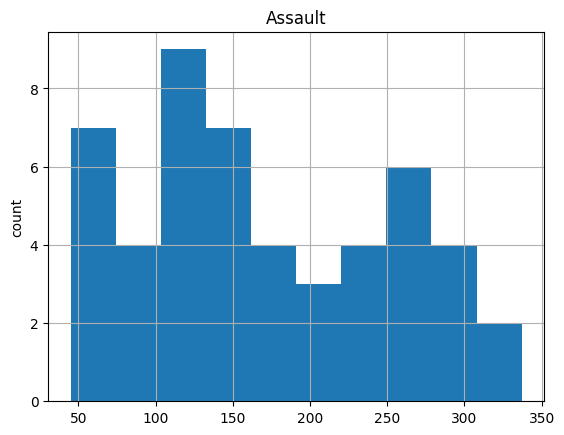

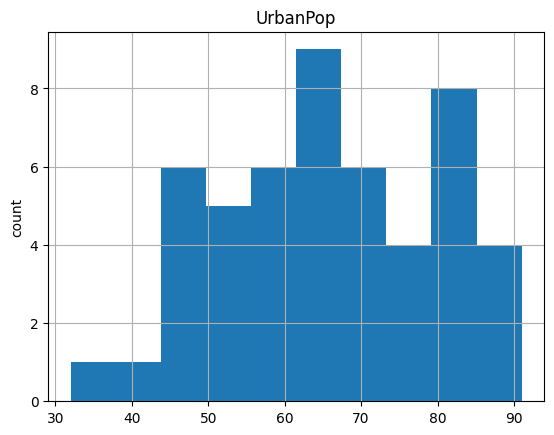

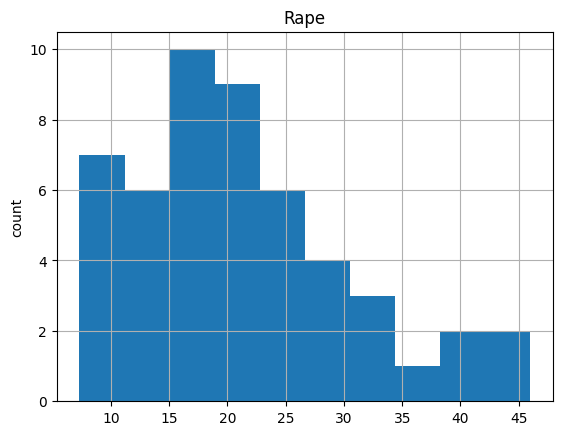

In [ ]:
col = data[['Murder', 'Assault', 'UrbanPop', 'Rape']]
for features in col.columns:
    data1 = data.copy()
    data1[features].hist(bins = 10)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

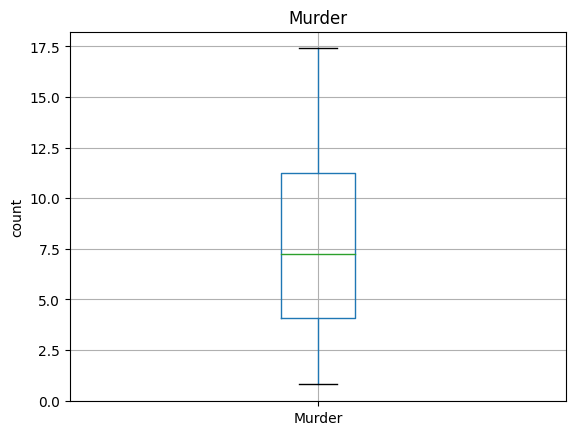

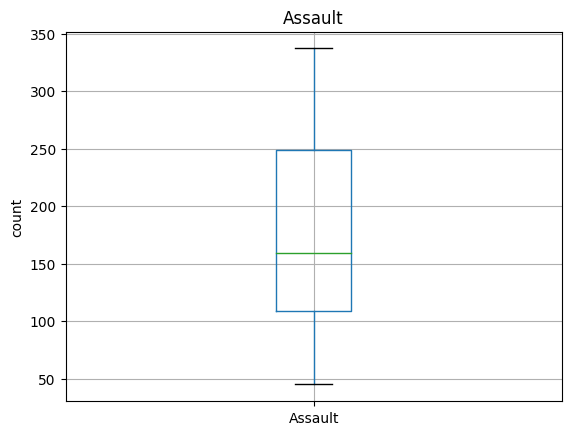

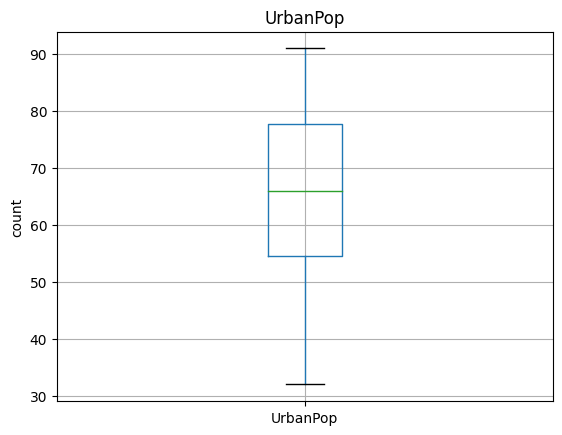

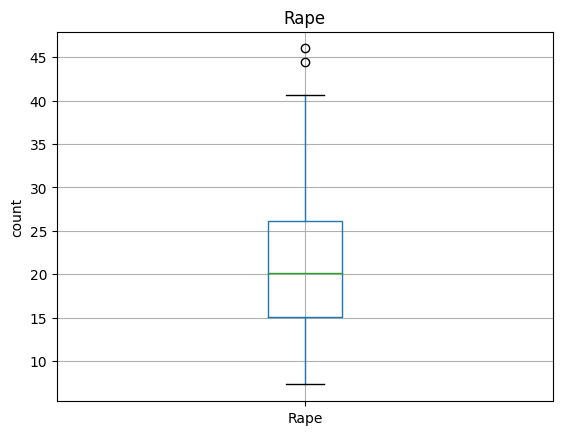

In [ ]:
# finding outliers
col1 = data[['Murder', 'Assault', 'UrbanPop', 'Rape']]
for feature in col1:
    data2 = data.copy()
    data2.boxplot(column = feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [ ]:
# treating outliers with IQR
q1 = data['Rape'].quantile(0.25)
q3 = data['Rape'].quantile(0.75)
IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
outliers = data[(data['Rape'] > upper_bound) | (data['Rape'] < lower_bound)]

new_data = data[(data['Rape'] < upper_bound) & (data['Rape'] > lower_bound)]
new_data = data.copy()
new_data.loc[(data['Rape'] > upper_bound), 'Rape'] = upper_bound
new_data.loc[(data['Rape'] < lower_bound), 'Rape'] = lower_bound

<Axes: xlabel='Rape'>

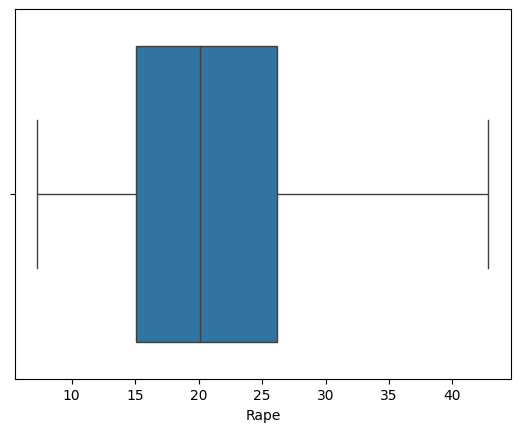

In [ ]:
sns.boxplot(x = 'Rape', data = new_data)

<ipython-input-23-15e211a5dd0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)


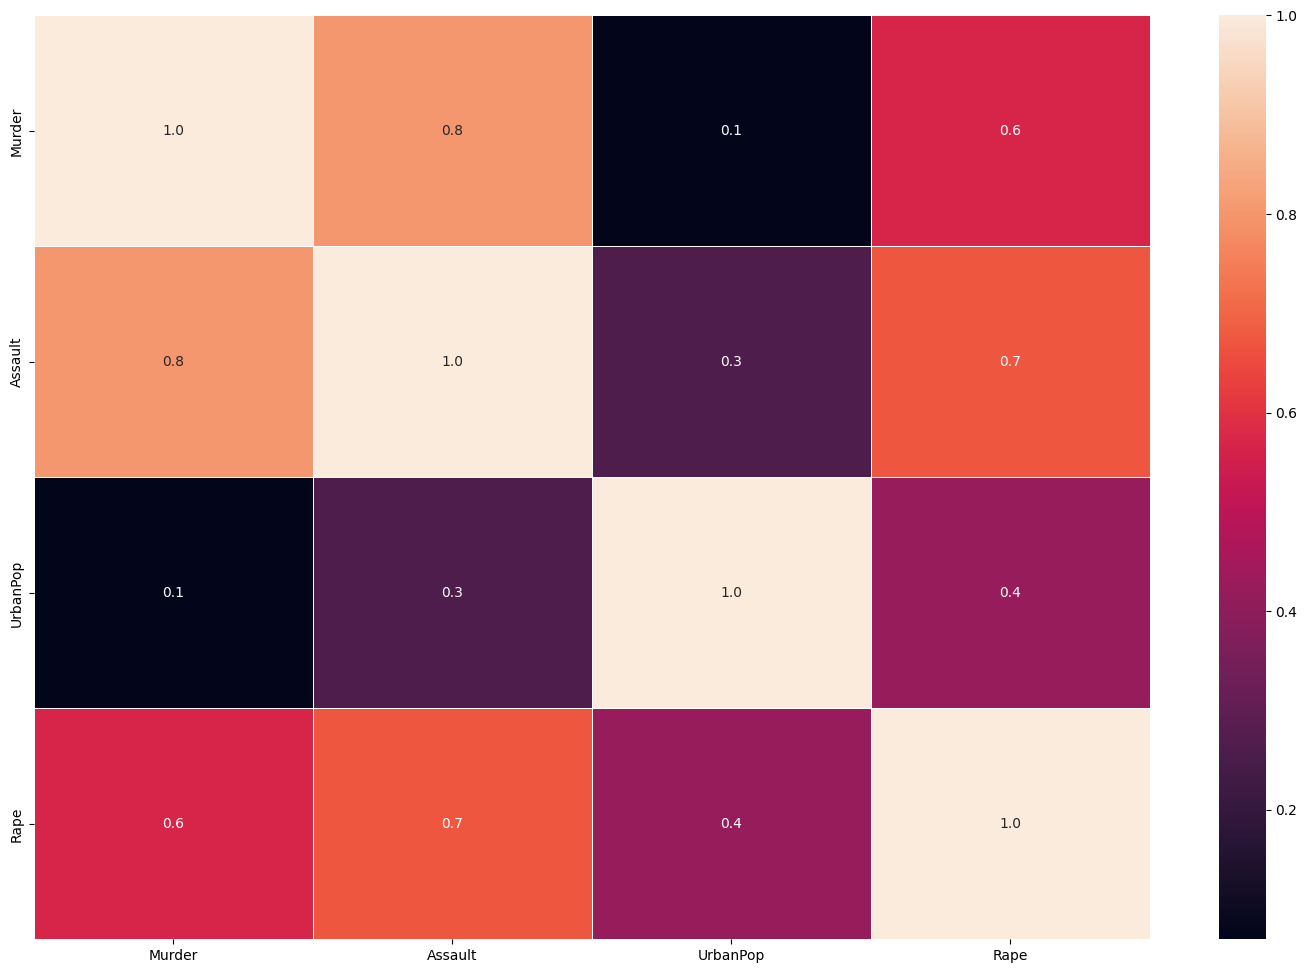

In [ ]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(new_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

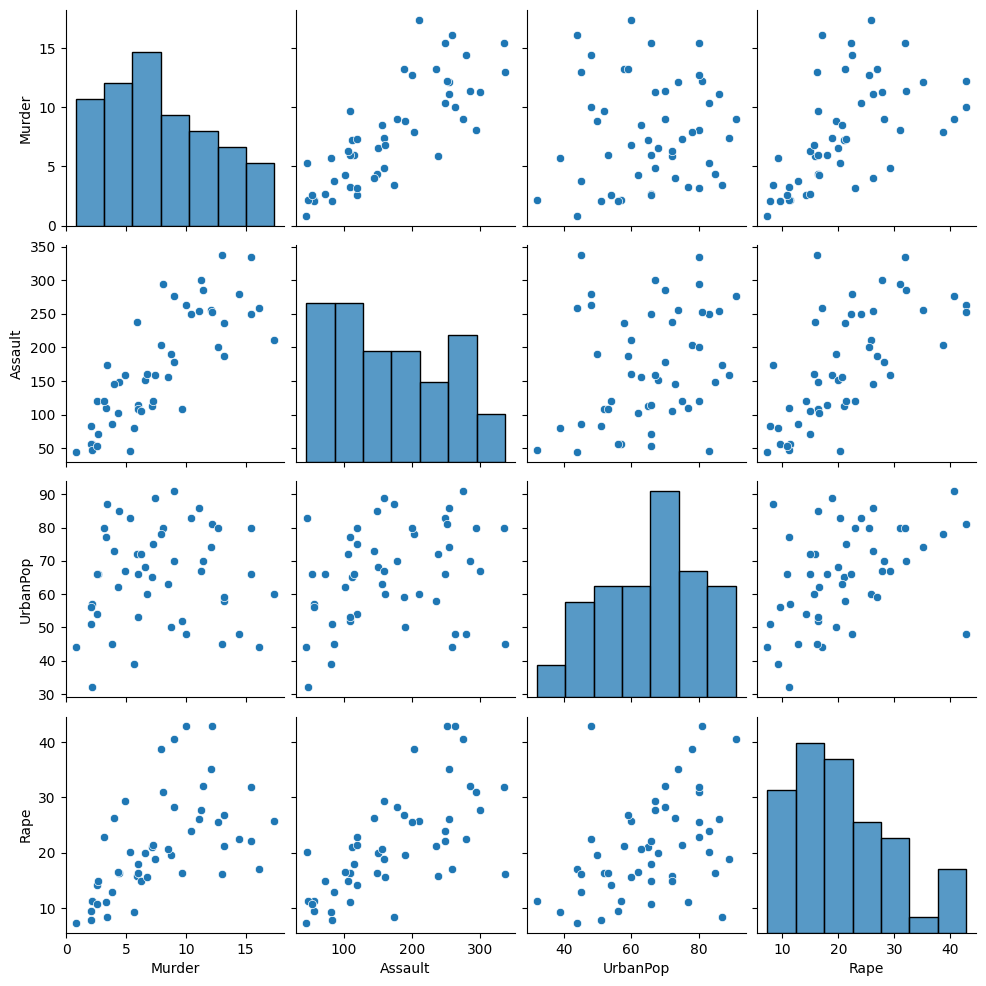

In [ ]:
sns.pairplot(data = new_data)

## Hierarchical clustering

In [ ]:
X = new_data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

from sklearn.preprocessing import Normalizer
n = Normalizer()
data1 = n.fit_transform(new_data.iloc[:,1:])

In [ ]:
data1

array([[0.05403139, 0.96601575, 0.23741065, 0.08677769],
       [0.03690892, 0.97070456, 0.17716281, 0.15806244],
       [0.02643862, 0.95962381, 0.26112213, 0.10118482],
       [0.04452761, 0.9613916 , 0.25299779, 0.09866914],
       [0.03065655, 0.94013412, 0.30997176, 0.13829509],
       [0.03559422, 0.91914181, 0.35143658, 0.17436661],
       [0.02448606, 0.81620208, 0.57134146, 0.08236221],
       [0.02367351, 0.95496538, 0.28889709, 0.06339686],
       [0.04447826, 0.96754652, 0.23105589, 0.09213353],
       [0.07853358, 0.95233247, 0.27080544, 0.11644634],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277],
       [0.01964047, 0.90648301, 0.40791735, 0.10726716],
       [0.03942842, 0.94400732, 0.31466911, 0.09098866],
       [0.05444736, 0.85452107, 0.49153867, 0.1588048 ],
       [0.02725092, 0.69365977, 0.70604655, 0.13997063],
       [0.04479483, 0.85856764, 0.49274317, 0.1343845 ],
       [0.07934635, 0.89162397, 0.42536189, 0.13333459],
       [0.0594568 , 0.96134697,

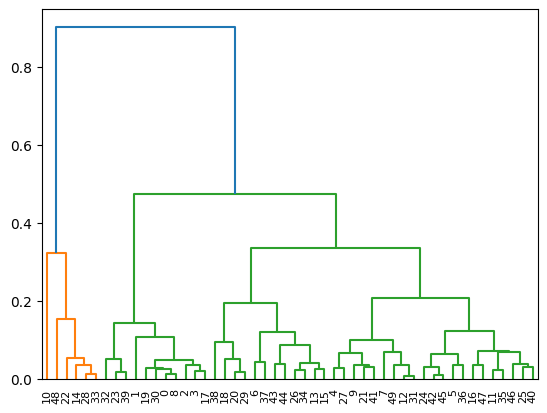

In [ ]:
import scipy.cluster.hierarchy as sch
dendrograms = sch.dendrogram(sch.linkage(data1, method='complete'))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='complete')
model.fit(data1)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [ ]:
clusters = model.fit_predict(data1)
clusters

array([2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 4, 0, 0, 1, 3, 1, 0, 2, 1, 2, 1, 0,
       3, 2, 0, 0, 1, 0, 3, 1, 2, 0, 2, 3, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 3, 0])

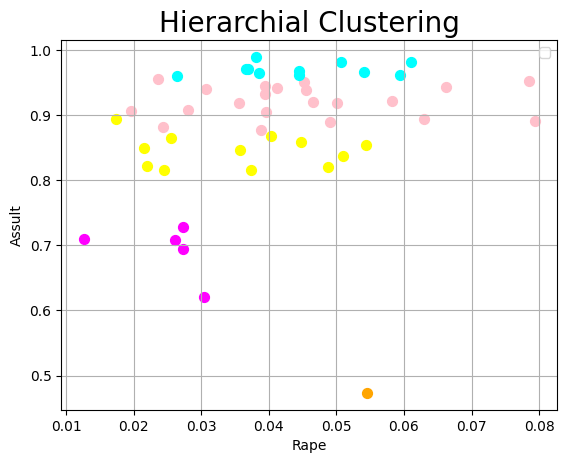

In [ ]:
plt.scatter(data1[clusters == 0, 0], data1[clusters == 0, 1], s = 50, c = 'pink')
plt.scatter(data1[clusters == 1, 0], data1[clusters == 1, 1], s = 50, c = 'yellow')
plt.scatter(data1[clusters == 2, 0], data1[clusters == 2, 1], s = 50, c = 'cyan')
plt.scatter(data1[clusters == 3, 0], data1[clusters == 3, 1], s = 50, c = 'magenta')
plt.scatter(data1[clusters == 4, 0], data1[clusters == 4, 1], s = 50, c = 'orange')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Rape')
plt.ylabel('Assult')
plt.legend()
plt.grid()
plt.show()

## K_means clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
model = kmeans.fit(data1)

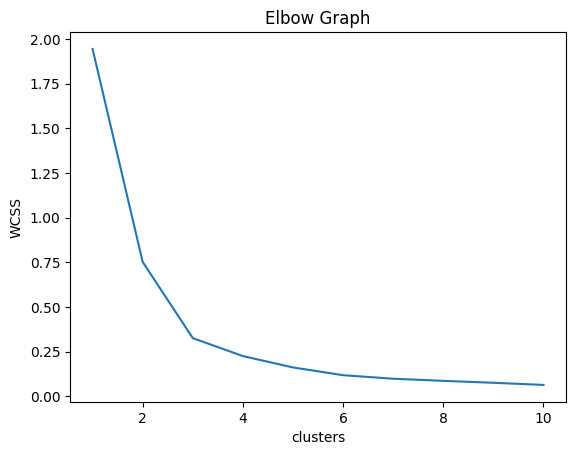

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    model = kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Graph")
plt.xlabel("clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
new_data['clusters_col'] = model.labels_
new_data.head()

,States,Murder,Assault,UrbanPop,Rape,clusters_col
0,Alabama,13.2,236,58,21.200,6
1,Alaska,10.0,263,48,42.825,0
2,Arizona,8.1,294,80,31.000,6
3,Arkansas,8.8,190,50,19.500,6
4,California,9.0,276,91,40.600,8


In [ ]:
new_data.groupby('clusters_col').agg(['mean']).reset_index()

,clusters_col,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.375000,284.500000,46.250000,24.631250
1,1,3.900000,99.666667,66.666667,11.266667
2,2,7.375000,166.250000,67.500000,24.025000
3,3,2.600000,53.000000,66.000000,10.800000
4,4,1.950000,57.500000,55.750000,10.750000
5,5,5.550000,126.500000,65.375000,15.550000
6,6,11.187500,265.875000,67.875000,25.187500
7,7,5.300000,46.000000,83.000000,20.200000
8,8,12.200000,240.714286,76.285714,31.617857


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data1,model.labels_)
score

0.33890831166104307

## DBScan clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (2).csv


In [ ]:
df=pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(df)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Adding clusters to dataset
df['clusters']=dbscan.labels_
df

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [ ]:
df.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


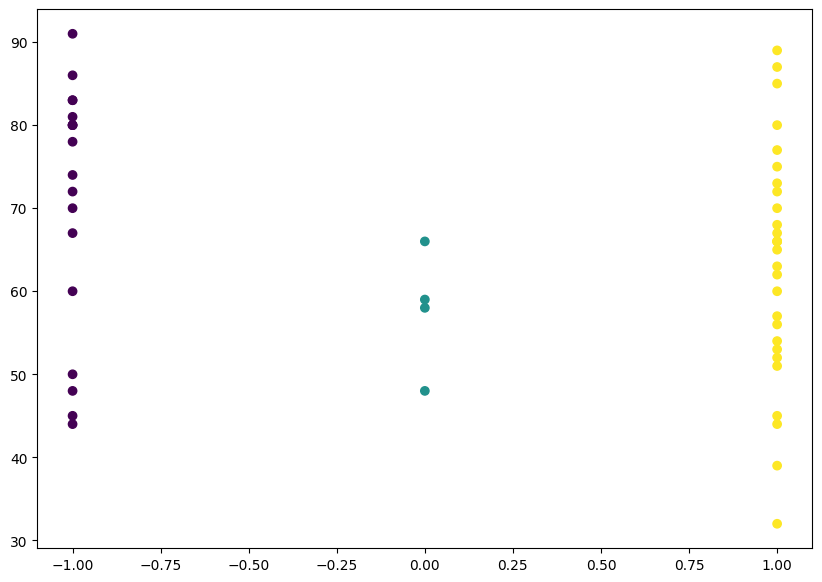

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_)